In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np
from matplotlib import colors
import glob 

In [2]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'depth'})
tmask = tmask.rename({'y' : 'gridY'})
tmask = tmask.rename({'x' : 'gridX'})
area = meshmask.e1t[0] * meshmask.e2t[0]
area = area.rename({'y': 'gridY'})
area = area.rename({'x': 'gridX'})
area
volumn = meshmask.e1t[0] * meshmask.e2t[0] * meshmask.e3t_0[0]
volumn = volumn.rename({'z' : 'depth'})
volumn = volumn.rename({'y' : 'gridY'})
volumn = volumn.rename({'x' : 'gridX'})
volumn

<xarray.DataArray (gridY: 898, gridX: 398, depth: 40)>
array([[[ 185243.37452372,  185244.08957647,  185245.48230844, ...,
         4988602.12148864, 4988890.54061969, 4989038.63339594],
        [ 190803.49776947,  190804.23428469,  190805.66881984, ...,
         5138336.18183385, 5138633.25793263, 5138785.79574822],
        [ 194672.17811027,  194672.92955888,  194674.39318027, ...,
         5242519.70259455, 5242822.80212832, 5242978.43275958],
        ...,
        [ 231245.03207738,  231245.92469983,  231247.66329022, ...,
         6227426.27406199, 6227786.3165811 , 6227971.18537267],
        [ 231250.84481954,  231251.73746443,  231253.47609851, ...,
         6227582.81114701, 6227942.8627164 , 6228127.73615497],
        [ 231256.65316662,  231257.54583394,  231259.28451169, ...,
         6227739.22987272, 6228099.29048557, 6228284.16856761]],

       [[ 185143.43441715,  185144.14908412,  185145.5410647 , ...,
         4985910.73547314, 4986198.99900004, 4986347.01187919],
        [ 190700.34398872,  190701.08010577,  190702.51386536, ...,
         5135558.25160667, 5135855.16709769, 5136007.62244701],
        [ 194576.87296009,  194577.62404081,  194579.08694566, ...,
         5239953.13590566, 5240256.08705178, 5240411.64149136],
...
        [ 177713.73998053,  177714.42596835,  177715.76208959, ...,
         4785829.142683  , 4786105.8383683 , 4786247.91157982],
        [ 177057.6964592 ,  177058.37991464,  177059.71110349, ...,
         4768161.89757515, 4768437.5718177 , 4768579.12055537],
        [ 176408.84861791,  176409.52956875,  176410.85587931, ...,
         4750688.43205494, 4750963.09605822, 4751104.12607462]],

       [[ 238327.01473203,  238327.93469145,  238329.72652694, ...,
         6418143.99223245, 6418515.06121492, 6418705.59169602],
        [ 238155.19081508,  238156.11011125,  238157.9006549 , ...,
         6413516.77596178, 6413887.57741887, 6414077.97053537],
        [ 237066.46303945,  237067.37813305,  237069.16049122, ...,
         6384197.3484508 , 6384566.45478697, 6384755.97752028],
        ...,
        [ 177165.58040949,  177166.26428137,  177167.59628134, ...,
         4771067.2112183 , 4771343.05343336, 4771484.68841883],
        [ 176356.6297533 ,  176357.31050258,  176358.63642053, ...,
         4749282.17858214, 4749556.761282  , 4749697.74955204],
        [ 175504.07273636,  175504.7501947 ,  175506.0697028 , ...,
         4726322.82711085, 4726596.08240155, 4726736.38909506]]])
Dimensions without coordinates: gridY, gridX, depth

In [3]:
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')
cm_vel = copy.copy(cm.curl)
cm_vel.set_bad('grey')

In [4]:
new_data = xr.open_dataset('/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_TA_DIC_20180101_20191231.nc')
new_data = new_data.drop(['time'])
time_values = ['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10','2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12']
new_data = new_data.assign_coords(time = time_values)
new_data

<xarray.Dataset>
Dimensions:                     (time: 24, depth: 40, gridY: 898, gridX: 398)
Coordinates:
  * depth                       (depth) float32 0.5 1.5 2.5 ... 414.5 441.5
  * gridY                       (gridY) int64 0 1 2 3 4 ... 893 894 895 896 897
  * gridX                       (gridX) int64 0 1 2 3 4 ... 393 394 395 396 397
  * time                        (time) <U7 '2018-01' '2018-02' ... '2019-12'
Data variables:
    dissolved_inorganic_carbon  (time, depth, gridY, gridX) float32 ...
    total_alkalinity            (time, depth, gridY, gridX) float32 ...
Attributes:
    name:         SalishSeaCast_wastewater_month_TA_DIC_20180101_20191231
    description:  Month-averaged DIC and TA extracted from SalishSeaCast v202...
    history:      2023-11-24 22:14 -08:00: Generated by `reshapr extract /oce...
    Conventions:  CF-1.6

In [5]:
jan18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180101_20180131.nc'
feb18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180201_20180228.nc'
mar18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180301_20180331.nc'
apr18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180401_20180430.nc'
may18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180501_20180531.nc'
jun18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180601_20180630.nc'
jul18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180701_20180731.nc'
aug18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180801_20180831.nc'
sep18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180901_20180930.nc'
octo18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20181001_20181031.nc'
nov18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20181101_20181130.nc'
dec18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20181201_20181231.nc'

jan19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20190101_20190131.nc'
feb19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20190201_20190228.nc'
mar19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20190301_20190331.nc'
apr19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20190401_20190430.nc'
may19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20190501_20190531.nc'
jun19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20190601_20190630.nc'
jul19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20190701_20190731.nc'
aug19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20190801_20190831.nc'
sep19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20190901_20190930.nc'
octo19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20191001_20191031.nc'
nov19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20191101_20191130.nc'
dec19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20191201_20191231.nc'

In [6]:
jan_file_list = glob.glob(jan18)
feb_file_list = glob.glob(feb18)
mar_file_list = glob.glob(mar18)
apr_file_list = glob.glob(apr18)
may_file_list = glob.glob(may18)
jun_file_list = glob.glob(jun18)
jul_file_list = glob.glob(jul18)
aug_file_list = glob.glob(aug18)
sep_file_list = glob.glob(sep18)
octo_file_list = glob.glob(octo18)
nov_file_list = glob.glob(nov18)
dec_file_list = glob.glob(dec18)

jan_file_list19 = glob.glob(jan19)
feb_file_list19 = glob.glob(feb19)
mar_file_list19 = glob.glob(mar19)
apr_file_list19 = glob.glob(apr19)
may_file_list19 = glob.glob(may19)
jun_file_list19 = glob.glob(jun19)
jul_file_list19 = glob.glob(jul19)
aug_file_list19 = glob.glob(aug19)
sep_file_list19 = glob.glob(sep19)
octo_file_list19 = glob.glob(octo19)
nov_file_list19 = glob.glob(nov19)
dec_file_list19 = glob.glob(dec19)

In [7]:
all_file_list = jan_file_list + feb_file_list + mar_file_list + apr_file_list + may_file_list + jun_file_list + jul_file_list + aug_file_list + sep_file_list + octo_file_list + nov_file_list + dec_file_list + jan_file_list19 + feb_file_list19 + mar_file_list19 + apr_file_list19 + may_file_list19 + jun_file_list19 + jul_file_list19 + aug_file_list19 + sep_file_list19 + octo_file_list19 + nov_file_list19 +dec_file_list19
base_data_dissolved_inorganic_carbon = xr.open_mfdataset(all_file_list, data_vars=['dissolved_inorganic_carbon'])
base_data_dissolved_inorganic_carbon = base_data_dissolved_inorganic_carbon.drop(['time'])
time_values = ['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10','2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12']
base_data_dissolved_inorganic_carbon = base_data_dissolved_inorganic_carbon.assign_coords(time = time_values)
base_data_dissolved_inorganic_carbon

<xarray.Dataset>
Dimensions:                     (depth: 40, gridY: 898, gridX: 398, time: 24)
Coordinates:
  * depth                       (depth) float32 0.5 1.5 2.5 ... 414.5 441.5
  * gridY                       (gridY) int64 0 1 2 3 4 ... 893 894 895 896 897
  * gridX                       (gridX) int64 0 1 2 3 4 ... 393 394 395 396 397
  * time                        (time) <U7 '2018-01' '2018-02' ... '2019-12'
Data variables:
    PAR                         (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    turbidity                   (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_inorganic_carbon  (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    total_alkalinity            (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_oxygen            (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    CO2_flux                    (time, gridY, gridX) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSeaCast_1m_chem_T_20180101_20180131
    description:  Month-averaged chemistry variables resampled from v202111 S...
    history:      2022-12-02 18:32 -08:00: Generated by reshapr.api.v1.extrac...
    Conventions:  CF-1.6

In [8]:
all_file_list = jan_file_list + feb_file_list + mar_file_list + apr_file_list + may_file_list + jun_file_list + jul_file_list + aug_file_list + sep_file_list + octo_file_list + nov_file_list + dec_file_list + jan_file_list19 + feb_file_list19 + mar_file_list19 + apr_file_list19 + may_file_list19 + jun_file_list19 + jul_file_list19 + aug_file_list19 + sep_file_list19 + octo_file_list19 + nov_file_list19 +dec_file_list19
base_data_total_alkalinity = xr.open_mfdataset(all_file_list, data_vars=['total_alkalinity'])
base_data_total_alkalinity = base_data_total_alkalinity.drop(['time'])
time_values = ['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10','2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12']
base_data_total_alkalinity = base_data_total_alkalinity.assign_coords(time = time_values)
base_data_total_alkalinity 

<xarray.Dataset>
Dimensions:                     (depth: 40, gridY: 898, gridX: 398, time: 24)
Coordinates:
  * depth                       (depth) float32 0.5 1.5 2.5 ... 414.5 441.5
  * gridY                       (gridY) int64 0 1 2 3 4 ... 893 894 895 896 897
  * gridX                       (gridX) int64 0 1 2 3 4 ... 393 394 395 396 397
  * time                        (time) <U7 '2018-01' '2018-02' ... '2019-12'
Data variables:
    PAR                         (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    turbidity                   (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_inorganic_carbon  (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    total_alkalinity            (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_oxygen            (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    CO2_flux                    (time, gridY, gridX) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSeaCast_1m_chem_T_20180101_20180131
    description:  Month-averaged chemistry variables resampled from v202111 S...
    history:      2022-12-02 18:32 -08:00: Generated by reshapr.api.v1.extrac...
    Conventions:  CF-1.6

In [9]:
diff_DIC = new_data['dissolved_inorganic_carbon'] - base_data_dissolved_inorganic_carbon['dissolved_inorganic_carbon']

In [10]:
diff_TA = new_data['total_alkalinity'] - base_data_total_alkalinity['total_alkalinity']

In [11]:
total_Diff_DIC = (diff_DIC * area).where(tmask).sum(axis = 2).sum(axis = 2) / area.where(tmask).sum(axis = 0).sum(axis = 0).sum(axis = 0)
total_Diff_TA = (diff_TA * area).where(tmask).sum(axis = 2).sum(axis = 2) / area.where(tmask).sum(axis = 0).sum(axis = 0).sum(axis = 0)

Text(1.05, 0.5, 'Total Diff DIC [$m^3/m^3$]')

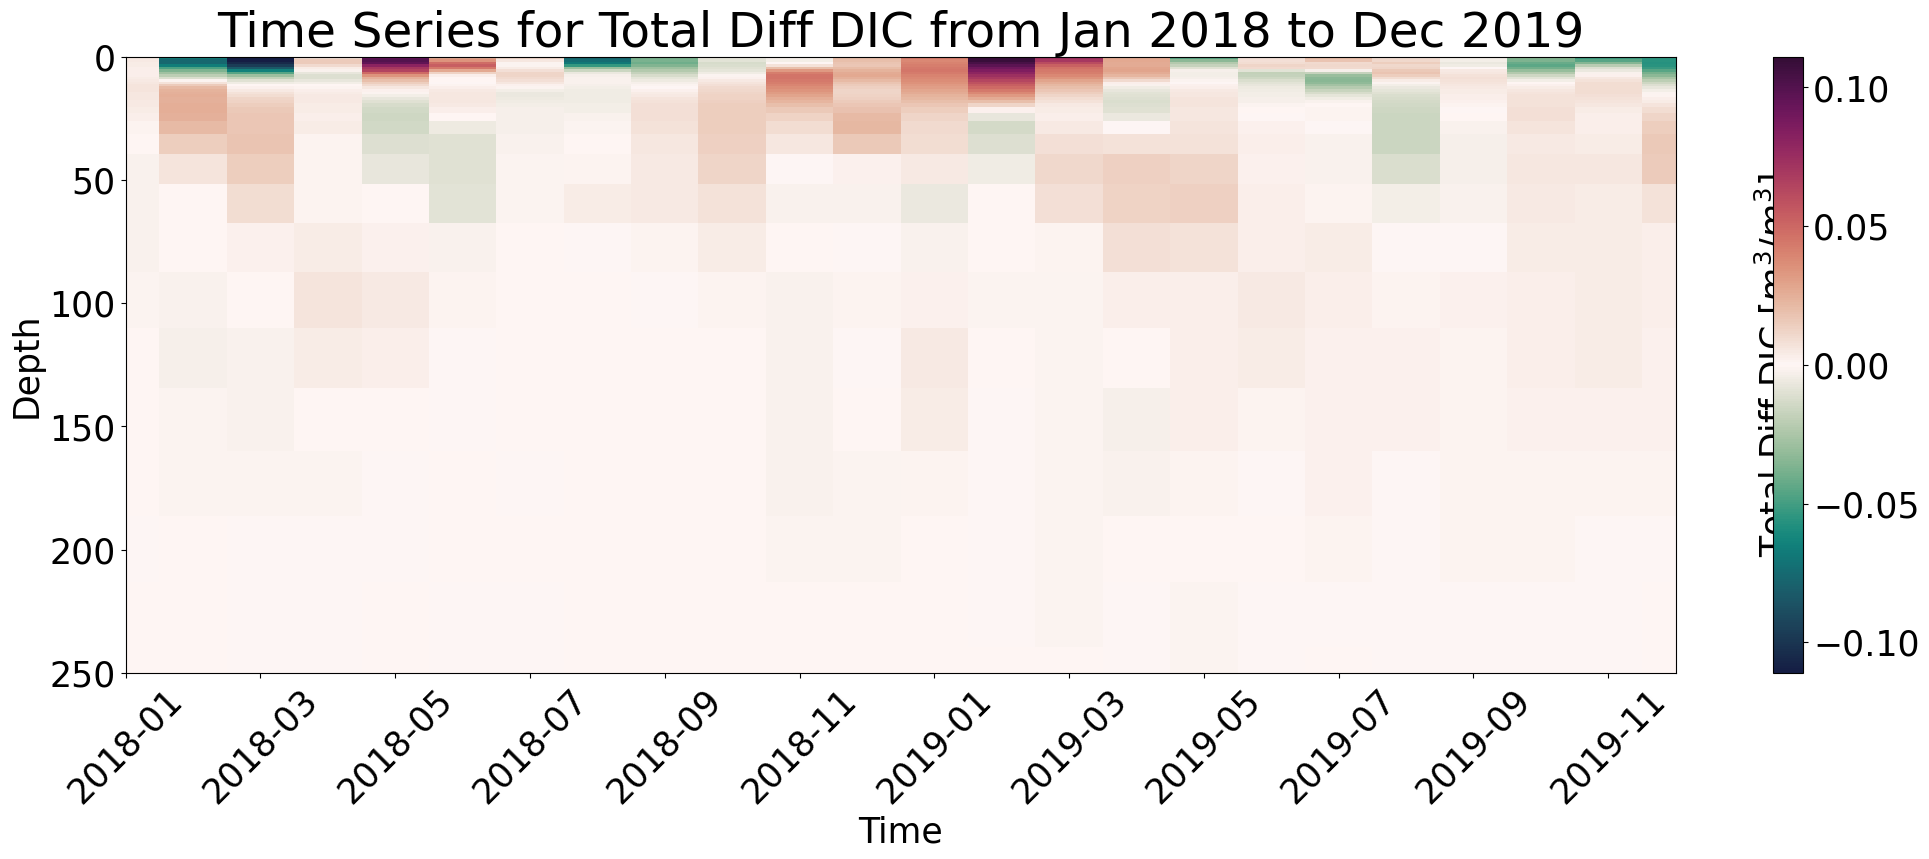

In [19]:
fig, axs = plt.subplots(1, 1, figsize=(25, 8))
plt.rcParams.update({'font.size': 25})
total_Diff_DIC.plot(ax = axs, y = "depth", yincrease = False, cmap = cm_vel)
displayed_time_index = time_values[::2]
axs.set_xticks(displayed_time_index)
axs.set_ylim(250, 0)
axs.set_title(f'Time Series for Total Diff DIC from Jan 2018 to Dec 2019', fontsize = 35)
axs.set_xlabel('Time')
axs.set_ylabel('Depth')
plt.setp(axs.get_xticklabels(), rotation=45)

label_text = 'Total Diff DIC [$m^3/m^3$]'  # Replace with the desired label text
label_x = 1.05  # Adjust the position of the label on the x-axis as needed
label_y = 0.5  # Adjust the position of the label on the y-axis as needed
axs.text(label_x, label_y, label_text, transform=axs.transAxes, rotation=90, va='center')


Text(1.05, 0.5, 'Total Diff TA [$m^3/m^3$]')

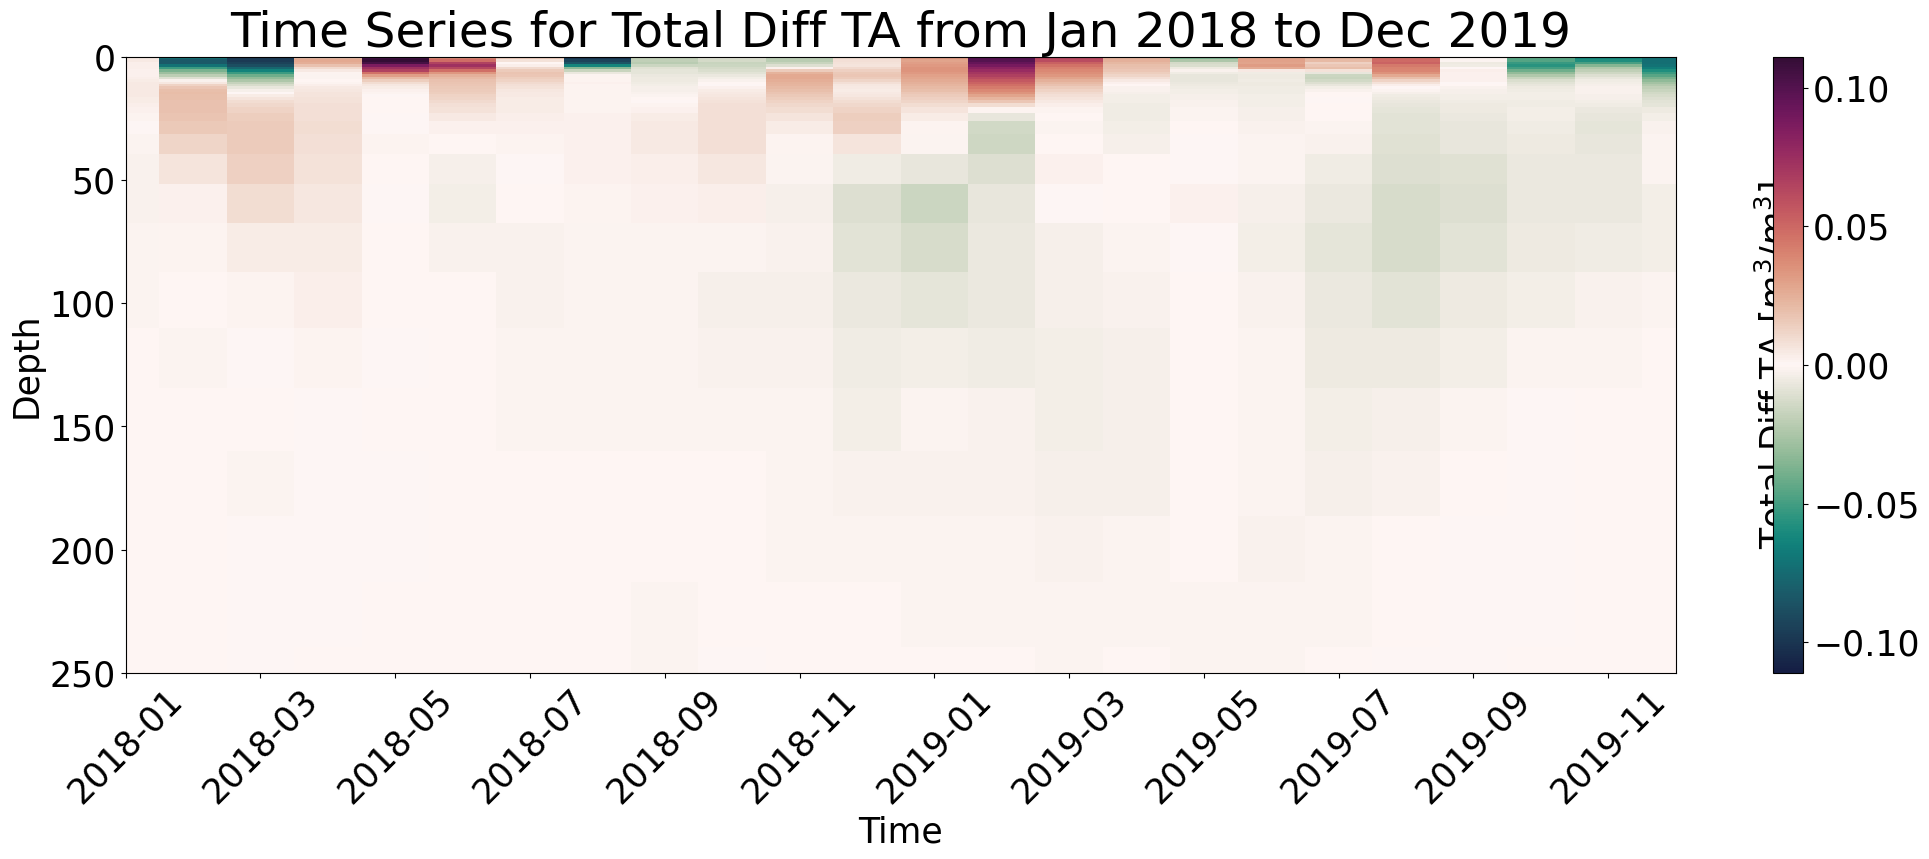

In [18]:
fig, axs = plt.subplots(1, 1, figsize=(25, 8))
plt.rcParams.update({'font.size': 25})
total_Diff_TA.plot(ax = axs, y = "depth", yincrease = False, cmap = cm_vel)
displayed_time_index = time_values[::2]
axs.set_xticks(displayed_time_index)
axs.set_ylim(250, 0)
axs.set_title(f'Time Series for Total Diff TA from Jan 2018 to Dec 2019', fontsize = 35)
axs.set_xlabel('Time')
axs.set_ylabel('Depth')
plt.setp(axs.get_xticklabels(), rotation=45)

label_text = 'Total Diff TA [$m^3/m^3$]'  # Replace with the desired label text
label_x = 1.05  # Adjust the position of the label on the x-axis as needed
label_y = 0.5  # Adjust the position of the label on the y-axis as needed
axs.text(label_x, label_y, label_text, transform=axs.transAxes, rotation=90, va='center')

In [14]:
DIC_sum = (total_Diff_DIC * volumn).where(tmask).sum(axis = 1).sum(axis = 1).sum(axis = 1)
TA_sum = (total_Diff_TA * volumn).where(tmask).sum(axis = 1).sum(axis = 1).sum(axis = 1)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

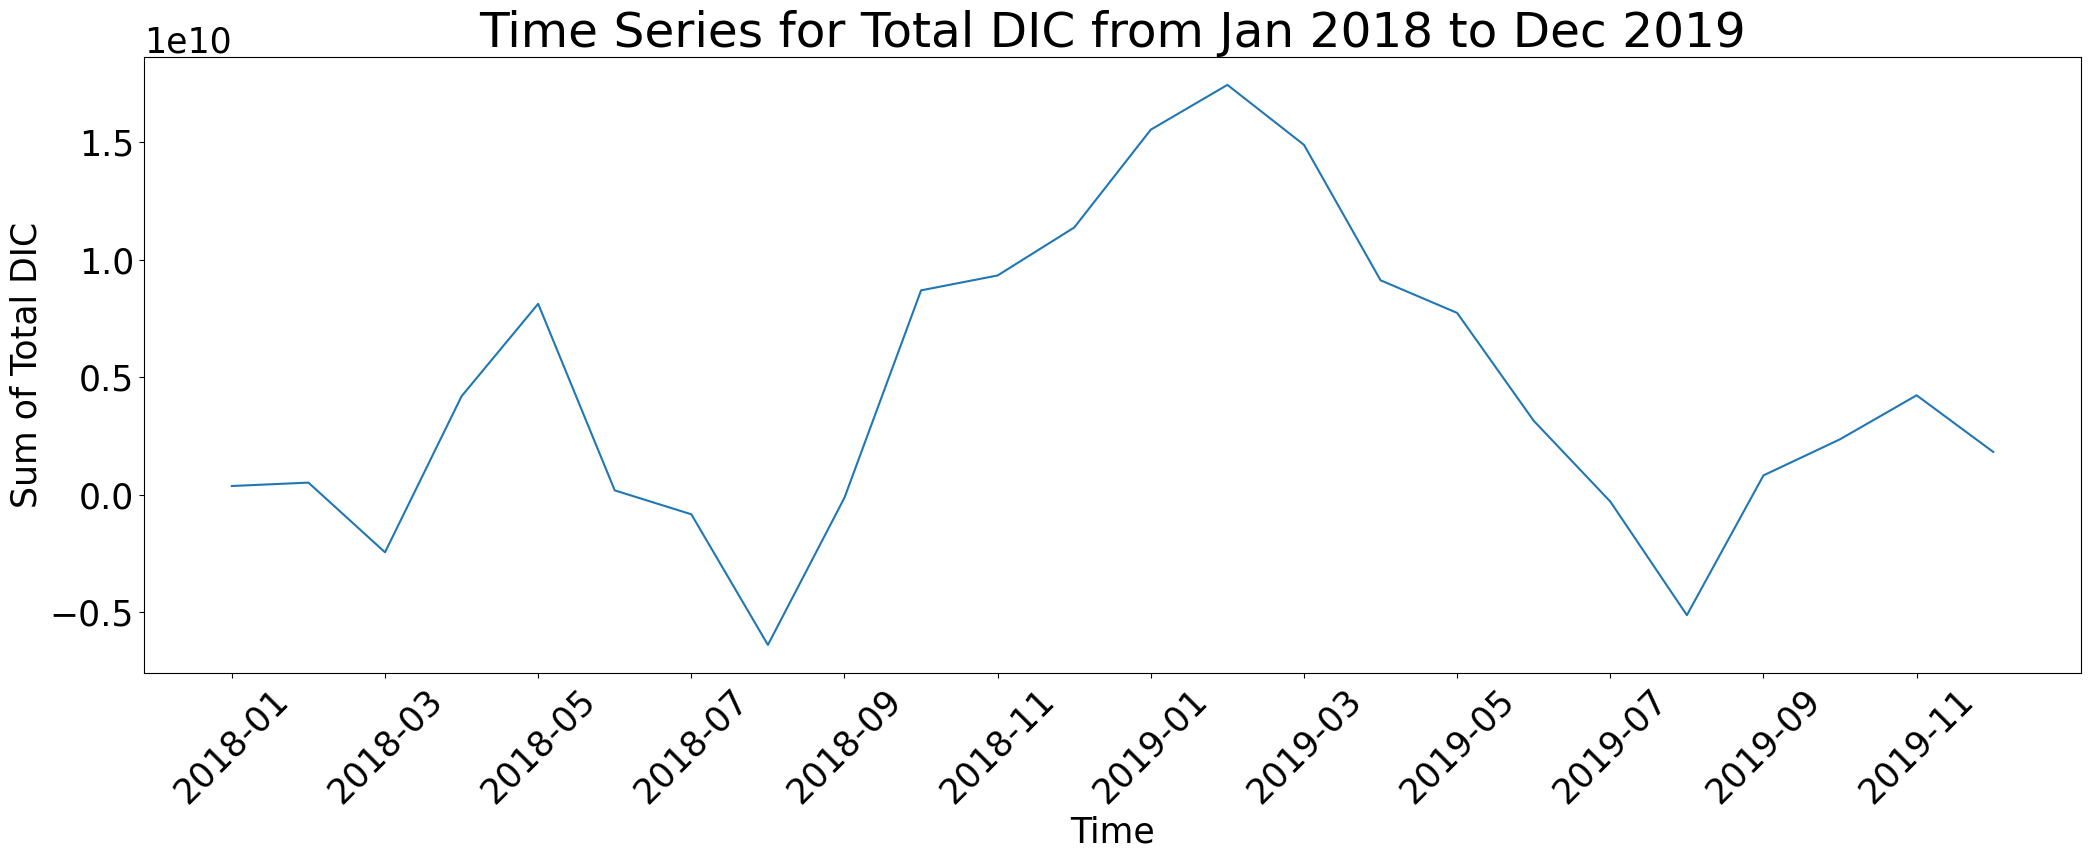

In [21]:
fig, axs = plt.subplots(1, 1, figsize=(25, 8))
plt.rcParams.update({'font.size': 25})
DIC_sum.plot(ax=axs)
displayed_time_index = time_values[::2]
axs.set_xticks(displayed_time_index)
axs.set_title(f'Time Series for Total DIC from Jan 2018 to Dec 2019', fontsize= 35)
axs.set_xlabel('Time')
axs.set_ylabel('Sum of Total DIC')
#axs.set_ylim([0, 2.5e8])
plt.setp(axs.get_xticklabels(), rotation=45)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

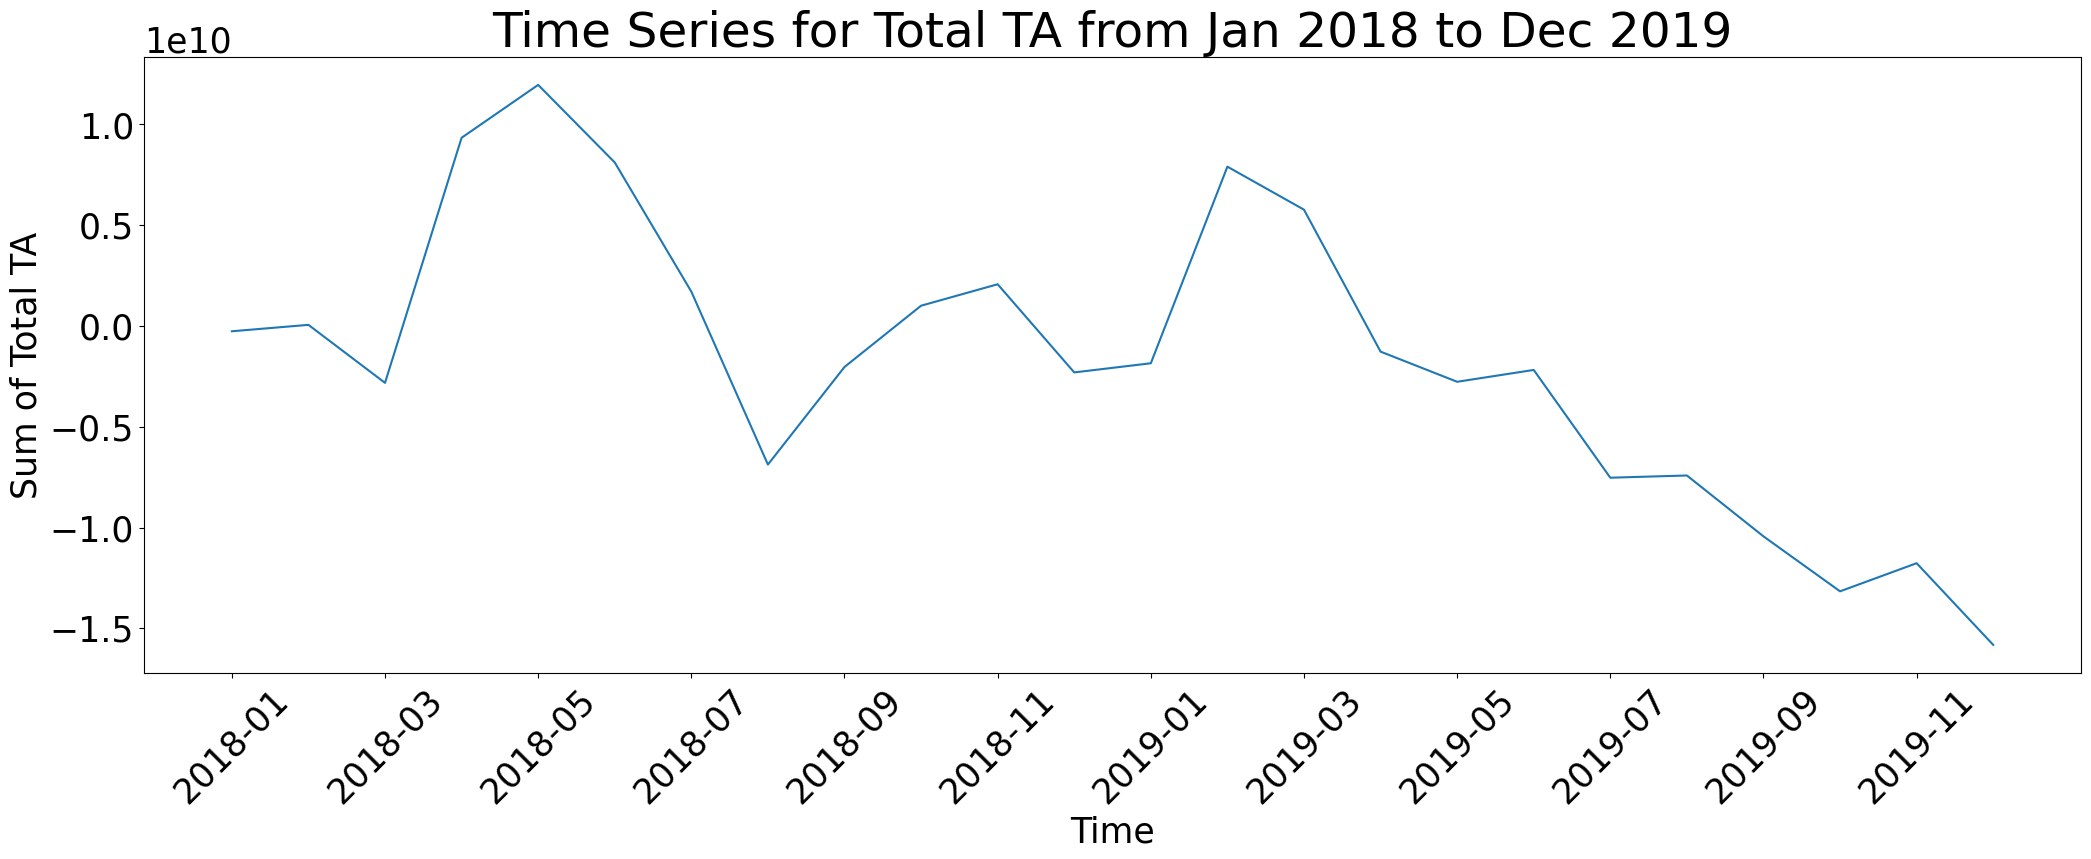

In [22]:
fig, axs = plt.subplots(1, 1, figsize=(25, 8))
plt.rcParams.update({'font.size': 25})
TA_sum.plot(ax=axs)
displayed_time_index = time_values[::2]
axs.set_xticks(displayed_time_index)
axs.set_title(f'Time Series for Total TA from Jan 2018 to Dec 2019', fontsize= 35)
axs.set_xlabel('Time')
axs.set_ylabel('Sum of Total TA')
plt.setp(axs.get_xticklabels(), rotation=45)